In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Optimized_price = []
# path = "/content/Datasets/Data_cleaned.csv.xls"
# df = pd.read_csv(path)
# Quantity = list(np.random.randint(1,10,size=len(df['BrandName'])))
# df = df.assign(Quantity = Quantity)  
# df = df[df.columns[[1, 2, 9, 4, 5]]]
# print(df)
def optimize(df):
  model = ols("Quantity ~ Selling_Price", data=df).fit()
  Price = list(range(int(df['MRP_Rs'][0]-(df['MRP_Rs'][0]*0.50)), int(df['MRP_Rs'][0]), 50))
  cost = df['MRP_Rs'][0]

  quantity = []
  Revenue = []

  for i in Price:
    demand = model.params[0] + (model.params[1] * i)
    quantity.append(demand)
    Revenue.append((cost-i) * demand)

  global profit
  profit = pd.DataFrame({"Price": Price, "Revenue": Revenue, "Quantity": quantity})
  #print(profit)
  max_val = profit.loc[(profit['Revenue'] == profit['Revenue'].max())]
  #print(max_val)
  Optimized_price.append(int(max_val['Price']))


In [ ]:
path = "/content/Datasets/Brandwise.csv.xls"
df1 = pd.read_csv(path)
path = "/content/Datasets/Data_cleaned.csv.xls"
df2 = pd.read_csv(path)
print(df1['Clearance_Date'])
print(df2['SellingDate'])

0      2022-09-21
1      2022-09-28
2      2022-09-14
3      2022-09-06
4      2022-09-24
          ...    
172    2022-09-04
173    2022-09-05
174    2022-09-06
175    2022-09-25
176    2022-09-23
Name: Clearance_Date, Length: 177, dtype: object
0        2021-11-04
1        2021-06-30
2        2021-02-12
3        2022-05-10
4        2022-03-14
            ...    
22545    2021-08-26
22546    2022-04-07
22547    2021-08-01
22548    2022-02-01
22549    2021-06-07
Name: SellingDate, Length: 22550, dtype: object


In [ ]:
path = "/content/Datasets/Histdata1.csv"
df1 = pd.read_csv(path)
path = "/content/Datasets/Histdata2.csv"
df2 = pd.read_csv(path)
path = "/content/Datasets/Histdata3.csv"
df3 = pd.read_csv(path)

for i in range(0, len(df1['MRP_Rs'])):
  li=[list(df1.iloc[i])]
  li.append(list(df2.iloc[i]))
  li.append(list(df3.iloc[i]))
  df = pd.DataFrame(li)
  df =  pd.DataFrame({"Selling_date":list(df[5]),
  "Quantity":list(df[6]),"MRP_Rs":list(df[2]), 'Selling_Price':list(df[3])})
  #print(df)
  optimize(df)
print(Optimized_price)
# df = pd.DataFrame(df['2'],df['4'],df['5'])
# r1=df1.iloc[0]
# r2=
# r3=
# print(list(r1))
#print(pd.DataFrame(df[3],df[6]))

[1250, 1749, 599, 1149, 849, 897, 649, 649, 1049, 749, 749, 499, 749, 299, 499, 599, 299, 649, 999, 999, 749, 649, 399, 999, 1399, 599, 499, 449, 499, 599, 849, 349, 1445, 999, 649, 449, 849, 499, 2245, 499, 1649, 499, 949, 949, 649, 499, 449, 999, 749, 699, 499, 1349, 1249, 1049, 749, 749, 799, 1295, 1149, 1449, 999, 349, 449, 1400, 1049, 999, 699, 499, 799, 349, 299, 999, 649, 849, 799, 349, 749, 997, 649, 649, 849, 1349, 449, 847, 349, 499, 849, 649, 499, 699, 1249, 649, 1249, 649, 849, 849, 1149, 749, 849, 349, 1300, 499, 749, 797, 349, 949, 849, 947, 947, 449, 999, 1449, 499, 449, 649, 849, 1249, 849, 1449, 499, 699, 649, 999, 999, 949, 499, 1099, 499, 999, 1399, 749, 499, 1145, 399, 399, 799, 949, 1099, 349, 849, 399, 1099, 599, 649, 849, 649, 499, 899, 249, 1249, 599, 499, 749, 799, 499, 999, 499, 897, 749, 449, 349, 649, 847, 899, 449, 799, 1200, 649, 699, 499, 949, 1399, 449, 899, 749, 599, 1349, 649, 699, 949, 699, 1099, 549, 1249, 499, 499, 799, 449, 749, 1749, 349, 749, 349

In [ ]:
print(list(range(7, 0, -1)))

[7, 6, 5, 4, 3, 2, 1]


In [ ]:
df1=pd.concat([df1, pd.DataFrame({"Optimized_Price":Optimized_price})], axis=1)
print(df1)

       Unnamed: 0                                            Details  MRP_Rs  \
0               1  solid cotton blend collar neck womens a-line d...    2500   
1               2  polyester peter pan collar womens blouson dres...    3499   
2               3  solid polyester blend wide neck womens regular...    1199   
3               4  stripes polyester sweetheart neck womens dress...    2299   
4               5  regular fit regular length denim womens jeans ...    1699   
...           ...                                                ...     ...   
22545       22546     beautiful white crystal silver plated earrings    1739   
22546       22547  womens metallic gold statement multilayered ch...     798   
22547       22548  nine pieces combo fashion non-precious metal b...    1339   
22548       22549                          womens pearl golden drops     449   
22549       22550                 ethnic gold plated jhumki earrings    1839   

       SellPrice_Rs  Discount_Percent S

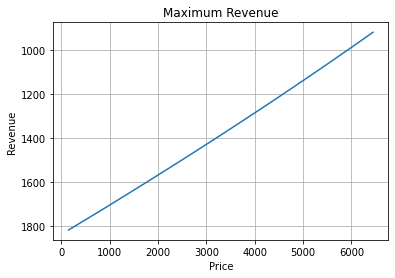

In [ ]:
x = list(profit['Revenue'])
y = list(profit['Price'])

  
plt.plot(x, y)
plt.grid()
  
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.title('Maximum Revenue')
  
plt.gca().invert_yaxis()  
plt.show()

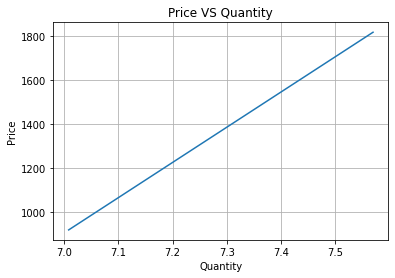

In [ ]:
x = list(profit['Quantity'])
y = list(profit['Price'])

plt.plot(x, y,'-')
plt.grid()
  
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.title('Price VS Quantity') 
plt.show()